In [38]:
# Import necessary modules and access file
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import metpy.calc as calc
from metpy.units import units
import pyart
from scipy.interpolate import interp2d


# Access the dataset
Data = Dataset("cm1out.nc")

# Get the number of time steps in the dataset
num_times = Data.dimensions['time'].size

dataslice = 0

print(num_times)

124


C:\Users\micha\AppData\Local\Temp\ipykernel_12216\4234996060.py:19: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f_u = interp2d(x, y, U10, kind='linear')
C:\Users\micha\AppData\Local\Temp\ipykernel_12216\4234996060.py:20: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for reg

PermissionError: [Errno 13] Permission denied: 'time_0.png'

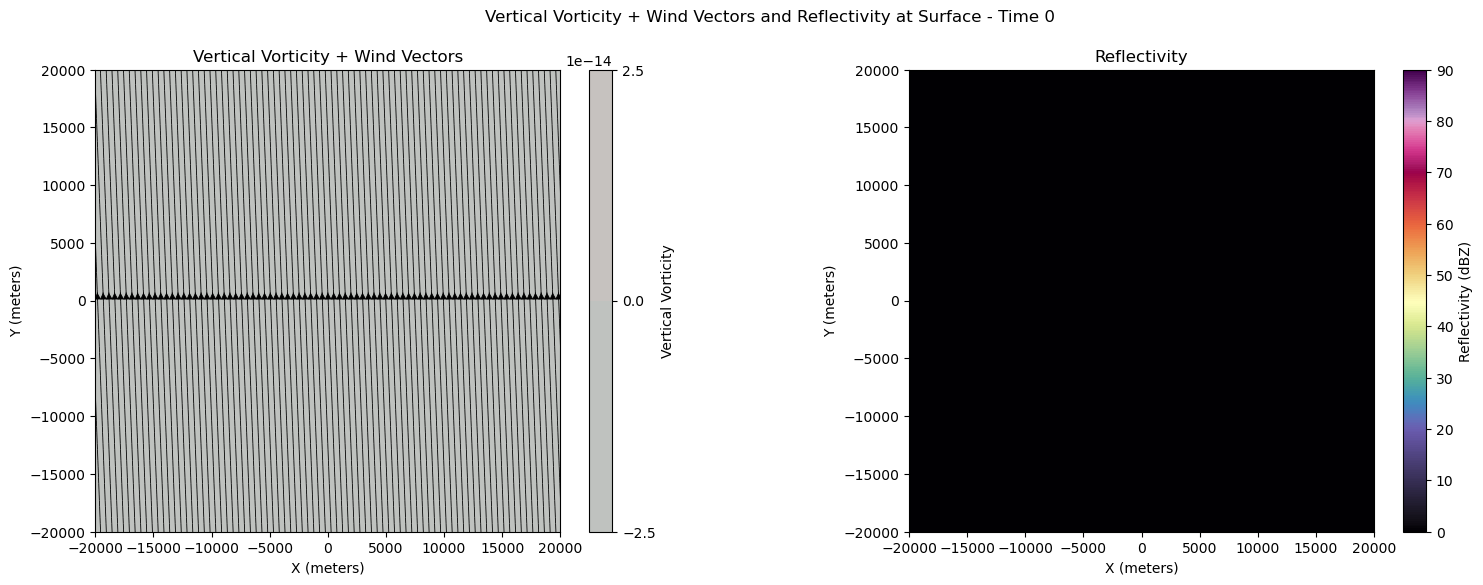

In [40]:
# Iterate through all times
for time in range(num_times):
    # Extract necessary variables (DbZ, U/V, X/Y) for the current time step
    x = Data['xh'][:].data * 1000
    y = Data['yh'][:].data * 1000
    u = Data['uinterp'][time, dataslice, :, :].data
    v = Data['vinterp'][time, dataslice, :, :].data
    V10 = Data['v10'][time,:,:].data
    U10 = Data['u10'][time,:,:].data
    zvort = Data['zvort'][time, dataslice, :, :].data
    ref = Data['dbz'][time, dataslice, :, :].data

    # Create regular 2D grid for interpolation
    x_reg = np.linspace(x.min(), x.max(), 1000)
    y_reg = np.linspace(y.min(), y.max(), 1000)
    x_reg, y_reg = np.meshgrid(x_reg, y_reg)

    # Interpolate the data onto the regular grid
    f_u = interp2d(x, y, U10, kind='linear')
    f_v = interp2d(x, y, V10, kind='linear')

    u_reg = f_u(x_reg[0, :], y_reg[:, 0])
    v_reg = f_v(x_reg[0, :], y_reg[:, 0])

    # Create plots with more space between subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    fig.suptitle(f'Vertical Vorticity + Wind Vectors and Reflectivity at Surface - Time {time}')

    # Plot vertical vorticity as colormesh overlaid by streamlines of u and v
    ax1.set_title('Vertical Vorticity + Wind Vectors')
    zvort_plot = ax1.contourf(x, y, zvort, cmap='pyart_Wild25', vmin=-0.1, vmax=0.1)
    cbar = plt.colorbar(zvort_plot, ax=ax1, label='Vertical Vorticity')

    # Plot streamlines with default spacing
    quiv = ax1.streamplot(x_reg[0, :], y_reg[:, 0], u_reg, v_reg, color='black', density=8, linewidth=0.6, arrowsize=1)

    ax1.set_xlabel('X (meters)')
    ax1.set_ylabel('Y (meters)')
    ax1.set_xlim([-20000, 20000])
    ax1.set_ylim([-20000, 20000])

    # Increase spacing between subplots
    plt.subplots_adjust(wspace=0.4)

    # Plot reflectivity with pyart_ChaseSpectral colormap and vmax=90
    ax2.set_title('Reflectivity')
    ref_plot = ax2.pcolormesh(x, y, ref, cmap='pyart_ChaseSpectral', vmin=0, vmax=90)
    ax2.set_xlabel('X (meters)')
    ax2.set_ylabel('Y (meters)')
    fig.colorbar(ref_plot, ax=ax2, label='Reflectivity (dBZ)')
    ax2.set_xlim([-20000, 20000])
    ax2.set_ylim([-20000, 20000])

    # Save the figure as a .png file
    plt.savefig(f'time_{time}.png')

    # Close the figure to prevent overlapping in the next iteration
    plt.close()